In [36]:
import os
import pickle
import glob
import numpy as np
from gensim.models import Word2Vec
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/home/hiwi/Dokumente/masterthesis/masterthesis/stats'

In [7]:
path_models = "/home/hiwi/Dokumente/masterthesis/archieve/ma_data/models/"
path_preprc = '/home/hiwi/Dokumente/masterthesis/archieve/ma_data/preprocessed/'

## Stats

In [73]:
files_none = glob.glob(path_preprc + "*_None")

corpus_none = []
for filename in files_none:
    corpus_none = corpus_none + pickle.load(open(filename, "rb")) 

corpus_none_flat = []
for sentence in corpus_none:
    for word in sentence:
        corpus_none_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_none)))
print("Words in corpus: " + str(len(corpus_none_flat)))
print("Unique words in corpus: " + str(len(set(corpus_none_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 38605


In [124]:
counter_none = Counter(corpus_none_flat)
focus_terms_none = counter_none.most_common(50)


In [84]:
#focus_terms_none

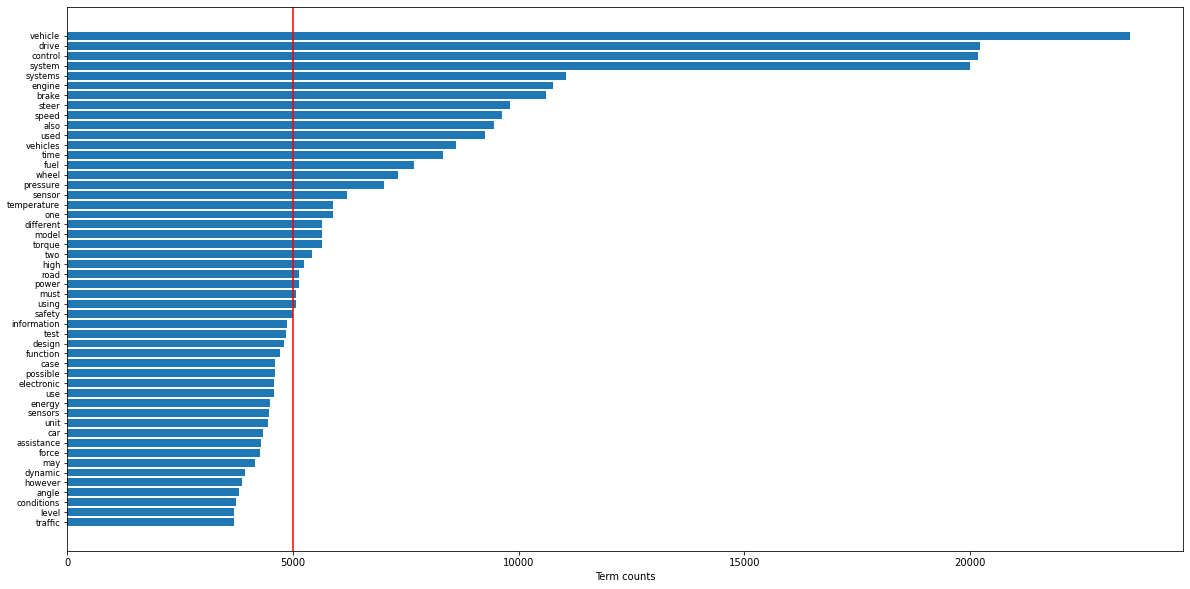

In [59]:
focus_terms_none.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_none))[0]
count = list(zip(*focus_terms_none))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(20,10))
plt.barh(y_pos, count, align='center')
plt.yticks(x_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

In [60]:
files_stem = glob.glob(path_preprc + "*_<PorterStemmer>")

corpus_stem = []
for filename in files_stem:
    corpus_stem = corpus_stem + pickle.load(open(filename, "rb"))

corpus_stem_flat = []
for sentence in corpus_stem:
    for word in sentence:
        corpus_stem_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_stem)))
print("Words in corpus: " + str(len(corpus_stem_flat)))
print("Unique words in corpus: " + str(len(set(corpus_stem_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 26093


In [125]:
counter_stem = Counter(corpus_stem_flat)
focus_terms_stem = counter_stem.most_common(50)

In [87]:
#focus_terms_stem

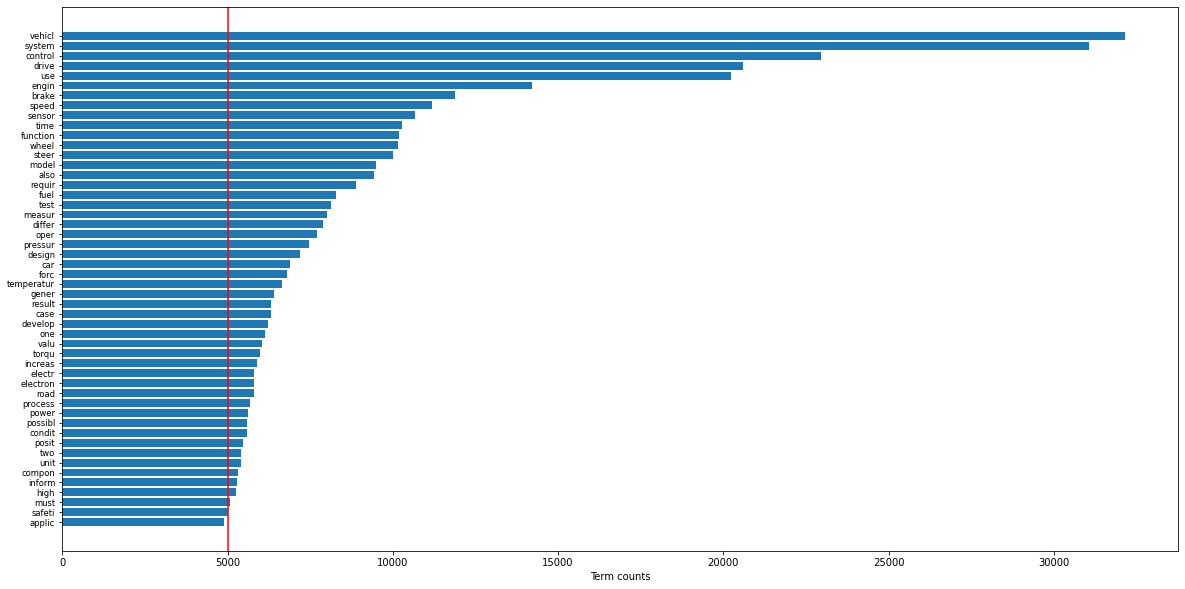

In [62]:
focus_terms_stem.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_stem))[0]
count = list(zip(*focus_terms_stem))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(20,10))
plt.barh(y_pos, count, align='center')
plt.yticks(x_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

In [63]:
files_lemma = glob.glob(path_preprc + "*_<WordNetLemmatizer>")

corpus_lemma = []
for filename in files_lemma:
    corpus_lemma = corpus_lemma + pickle.load(open(filename, "rb"))

corpus_lemma_flat = []
for sentence in corpus_lemma:
    for word in sentence:
        corpus_lemma_flat.append(word)

print("Sentences in corpus: " + str(len(corpus_lemma)))
print("Words in corpus: " + str(len(corpus_lemma_flat)))
print("Unique words in corpus: " + str(len(set(corpus_lemma_flat))))

Sentences in corpus: 176591
Words in corpus: 2230742
Unique words in corpus: 31714


In [126]:
counter_lemma = Counter(corpus_lemma_flat)
focus_terms_lemma = counter_lemma.most_common(50)

In [90]:
#focus_terms_lemma

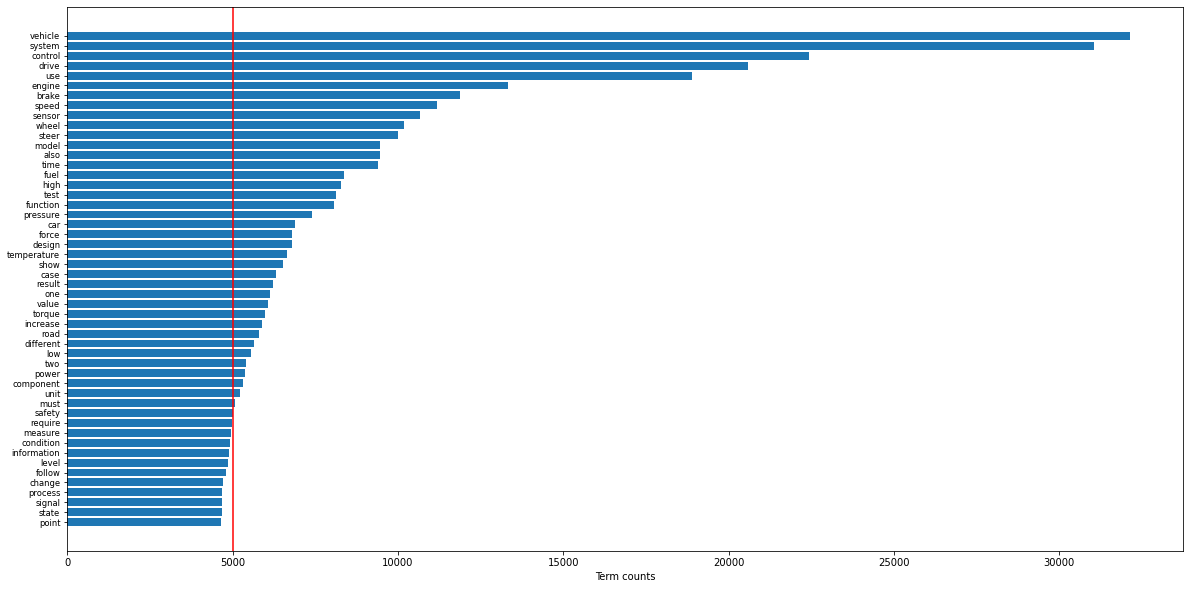

In [65]:
focus_terms_lemma.sort(key=lambda x: x[1], reverse=False)
terms = list(zip(*focus_terms_lemma))[0]
count = list(zip(*focus_terms_lemma))[1]
y_pos = np.arange(len(terms))

plt.figure(figsize=(20,10))
plt.barh(y_pos, count, align='center')
plt.yticks(x_pos, terms, fontsize="small")
plt.xlabel('Term counts')
plt.axvline(5000, color='r')
plt.show()

## Models

In [113]:
from sklearn.manifold import TSNE

In [127]:
terms_none = []

for term in focus_terms_none:
    terms_none.append(term[0])

In [100]:
model_none = Word2Vec.load(path_models+"word2vec_none_unigram.bin")

In [101]:
len(list(model_none.wv.vocab))

15924

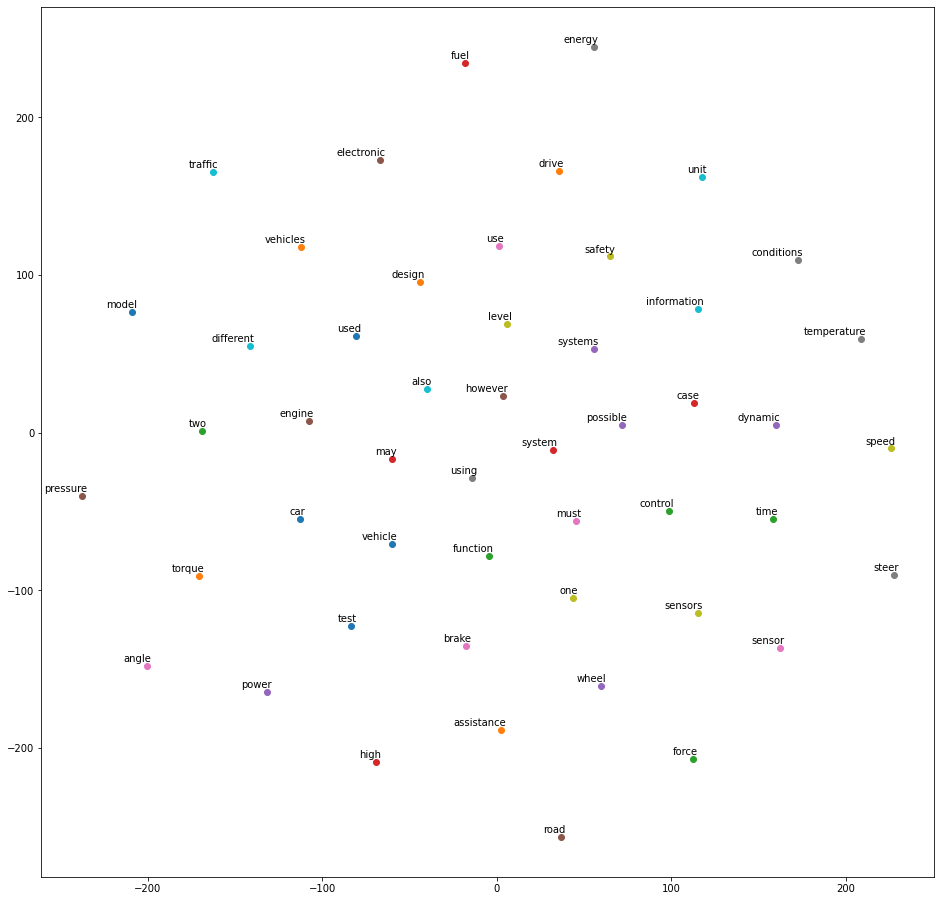

In [128]:
labels = []
tokens = []

for term in terms_none:
    tokens.append(model_none[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

In [129]:
terms_stem = []

for term in focus_terms_stem:
    terms_stem.append(term[0])

model_stem = Word2Vec.load(path_models+"word2vec_stem_unigram.bin")

len(list(model_stem.wv.vocab))

9936

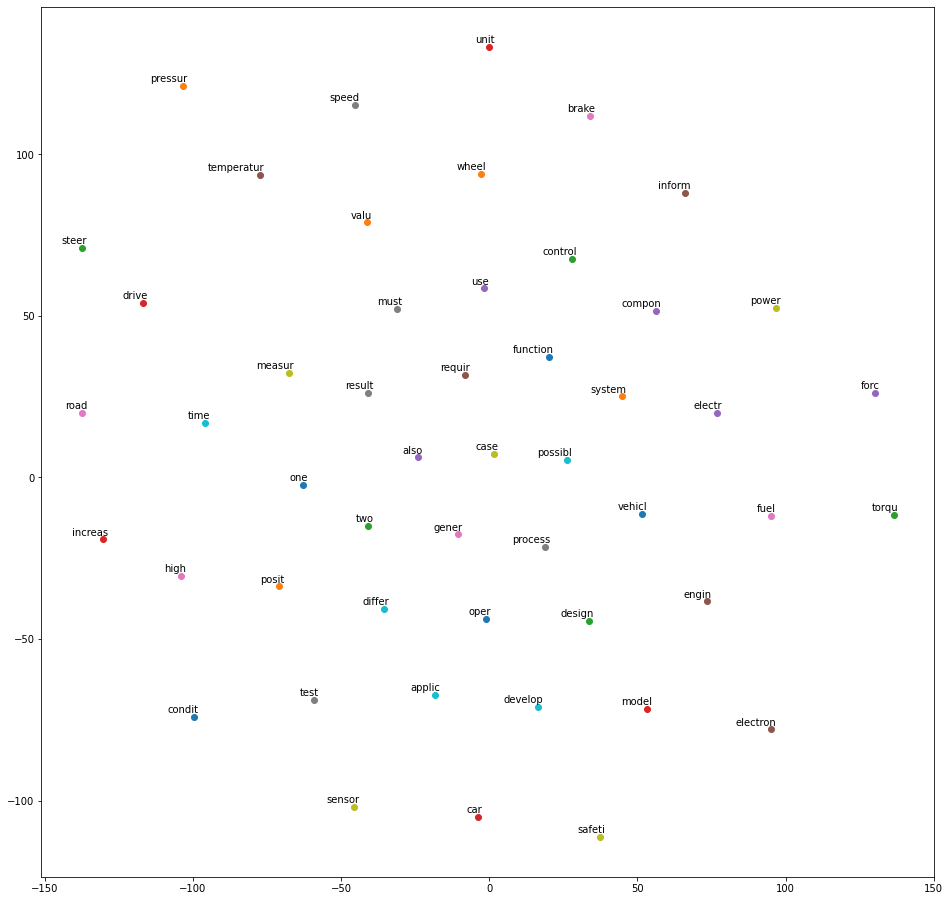

In [130]:
labels = []
tokens = []

for term in terms_stem:
    tokens.append(model_stem[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

In [131]:
terms_lemma = []

for term in focus_terms_lemma:
    terms_lemma.append(term[0])

model_lemma = Word2Vec.load(path_models+"word2vec_lemma_unigram.bin")

len(list(model_lemma.wv.vocab))

12322

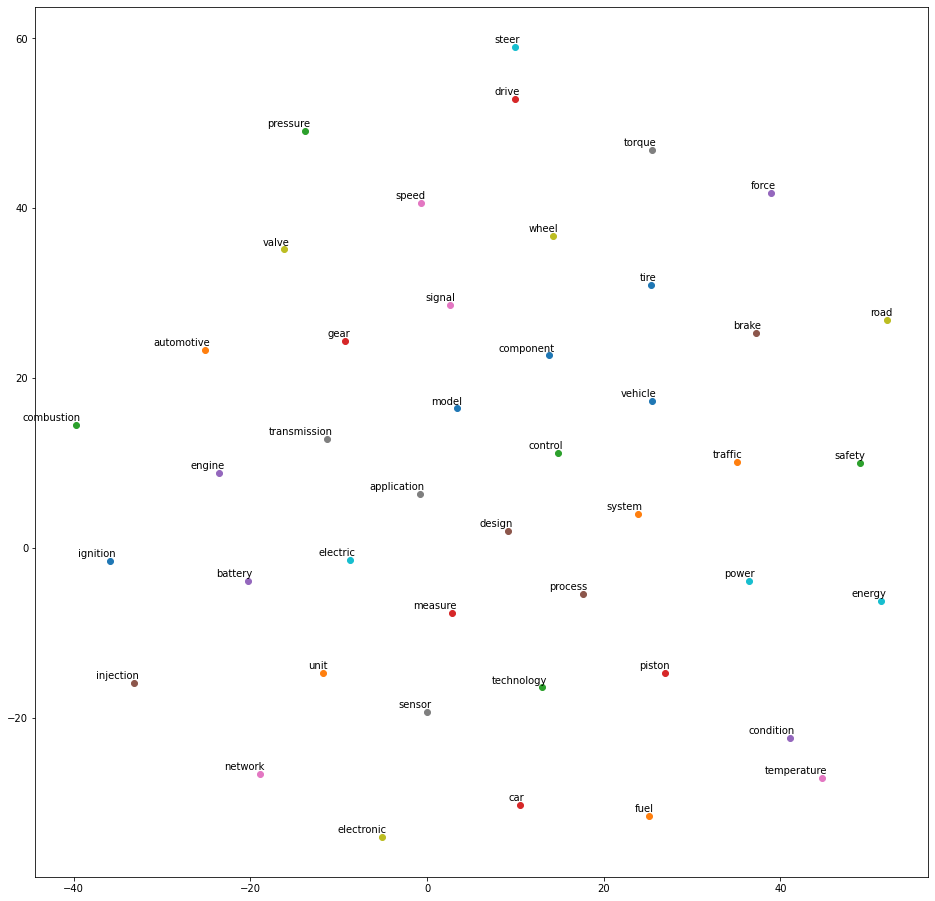

In [134]:
terms_lemma = ["vehicle", "system", "control", "drive", "engine", "brake", "speed", "sensor", "wheel", "steer", "model","fuel", "pressure", "car", "force", "design", "temperature", "torque", "road", "power", "component", "unit", "safety", "measure", "condition", "process", "signal", "application", "electronic", "energy", "tire", "traffic", "combustion", "piston", "battery", "injection", "network", "transmission", "valve", "electric", "ignition", "automotive", "technology", "gear"]

labels = []
tokens = []

for term in terms_lemma:
    tokens.append(model_lemma[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()

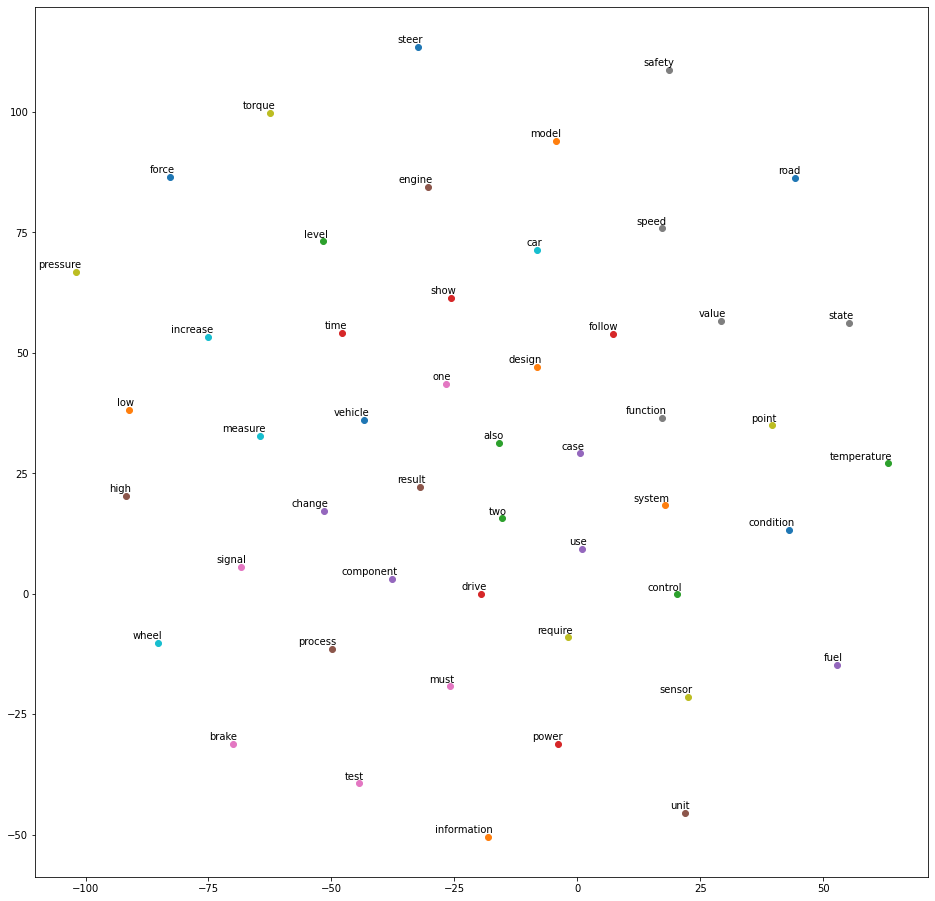

In [133]:
#terms_lemma.remove("steer")
#terms_lemma.remove("angle")
#terms_lemma.remove("model")

terms_lemma.remove("different")

labels = []
tokens = []

for term in terms_lemma:
    tokens.append(model_lemma[term])
    labels.append(term)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5,2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()